<a href="https://colab.research.google.com/github/Charuskm/projects/blob/master/Blinkit_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
**BLINKIT DATA ANALYSIS**
```



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('/Blinkitdata.csv')

In [12]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


To find the shape of the data:

In [13]:
shape=df.shape
print("Shape of the data:",shape)

Shape of the data: (8523, 12)


To know the name of the column

In [14]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

To find the datatypes:

In [15]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


**DATA CLEANING**

In [16]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [18]:

df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

**BUSINESS REQUIREMENTS**

KPI REQUIREMENTS:
1)To find the sum of sales
2)To find the avg of sales
3)To find the number of items sold
4)To find the average of ratings

In [19]:
Total_sales=df['Sales'].sum()
print(f"Total Sales : ${Total_sales:,.0f}")

Total Sales : $1,201,681


In [20]:
avg_sales=df['Sales'].mean()
print(f"Total Sales : ${avg_sales:,.0f}")

Total Sales : $141


In [21]:
item_sold=df['Sales'].count()
print(f"Total Sales : {item_sold:,.0f}")

Total Sales : 8,523


In [22]:
avg_ratings=df['Rating'].mean()
print(f"Total Sales : {avg_ratings:,.1f}")

Total Sales : 4.0


CHARTS REQUIREMENTS

TOTAL SALES BY ITEM_FAT_CONTENT

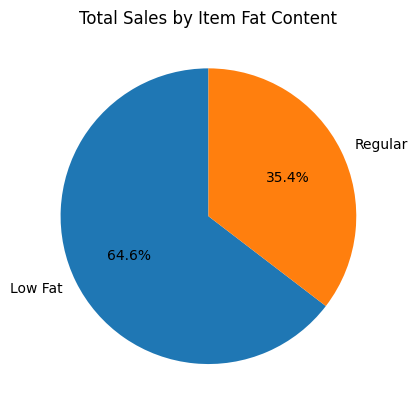

In [23]:
sales_by_item_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_item_fat,labels=sales_by_item_fat.index,autopct='%1.1f%%',startangle=90)
plt.title('Total Sales by Item Fat Content')
plt.show()

TOTAL SALES BY ITEM_TYPE

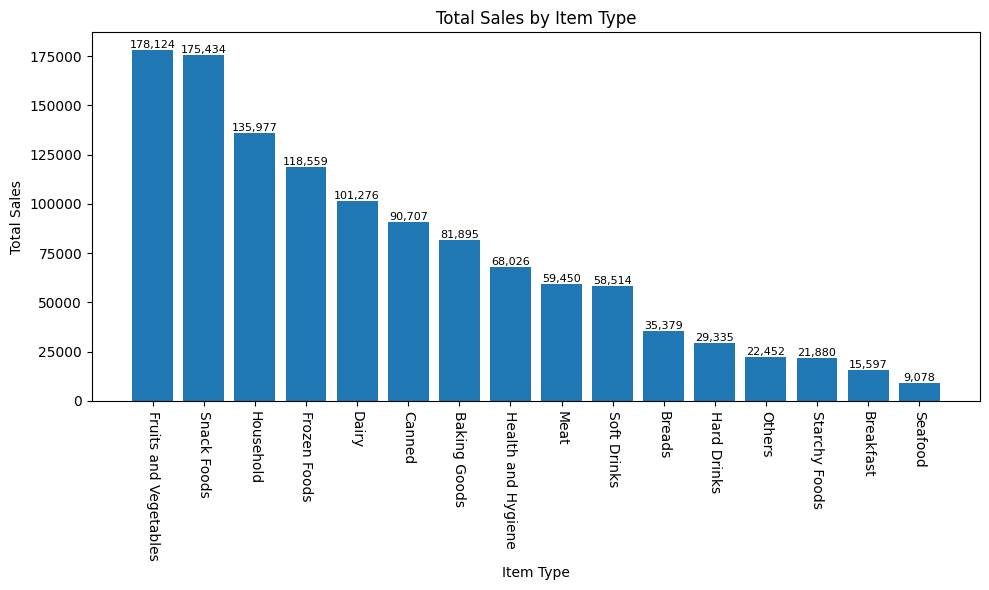

In [26]:
sales_by_type = df.groupby('Item Type') ['Sales'].sum().sort_values (ascending=False)
plt.figure(figsize=(10, 6))
bars= plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

FAT CONTENT BY OUTLET FOR TOTAL SALES

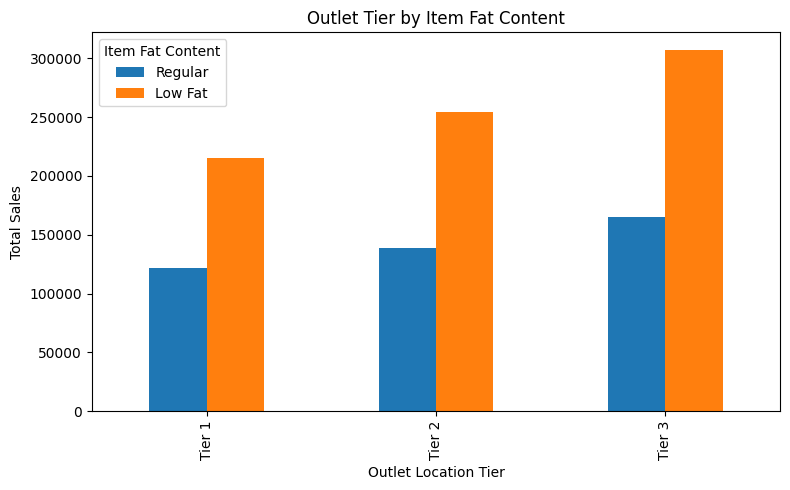

In [27]:
grouped=df.groupby(['Outlet Location Type', 'Item Fat Content']) ['Sales'].sum().unstack()
grouped=grouped [['Regular', 'Low Fat']]
ax=grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

TOTAL SALES BY OUTLET ESTABLISHMENT

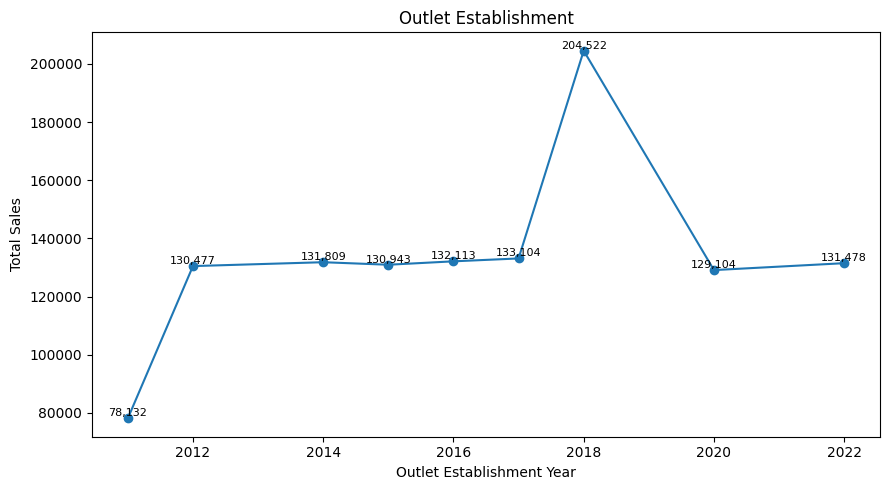

In [31]:
sales_by_year = df.groupby('Outlet Establishment Year') ['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))

plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

SALES BY OUTLET SIZE

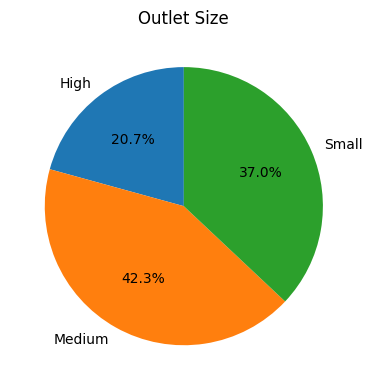

In [33]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()

df.groupby('Outlet Size') ['Sales'].sum()

plt.figure(figsize=(4, 4))

plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

SALES BY OUTLET LOCATION

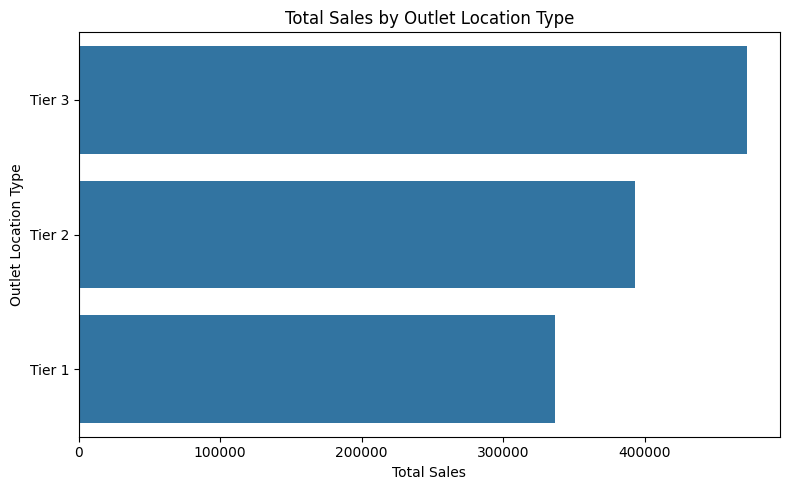

In [34]:
sales_by_location= df.groupby('Outlet Location Type') ['Sales'].sum().reset_index()

sales_by_location=sales_by_location.sort_values('Sales', ascending=False)
plt.figure(figsize=(8, 5)) # Smaller height, enough width

ax=sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout() # Ensures Layout fits without scroll
plt.show()